In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('newfile.csv')

In [3]:
# Inspect the data
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      userID  ttmovieID  imdbID  rating      review_date
0  ur4592644  tt0120884  120884      10  16 January 2005
1  ur3174947  tt0118688  118688       3  16 January 2005
2  ur3780035  tt0387887  387887       8  16 January 2005
3  ur4592628  tt0346491  346491       1  16 January 2005
4  ur3174947  tt0094721   94721       8  16 January 2005


In [4]:
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669820 entries, 0 to 4669819
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   userID       object
 1   ttmovieID    object
 2   imdbID       int64 
 3   rating       int64 
 4   review_date  object
dtypes: int64(2), object(3)
memory usage: 178.1+ MB
None


In [5]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             imdbID        rating
count  4.669820e+06  4.669820e+06
mean   2.558105e+06  6.758660e+00
std    3.249367e+06  2.978028e+00
min    1.000000e+00  1.000000e+00
25%    1.656672e+05  5.000000e+00
50%    9.449470e+05  8.000000e+00
75%    4.154756e+06  9.000000e+00
max    1.357611e+07  1.000000e+01


In [6]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
userID         0
ttmovieID      0
imdbID         0
rating         0
review_date    0
dtype: int64


In [7]:
df['review_date'] = pd.to_datetime(df['review_date'], format='%d %B %Y')

/home/matias/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


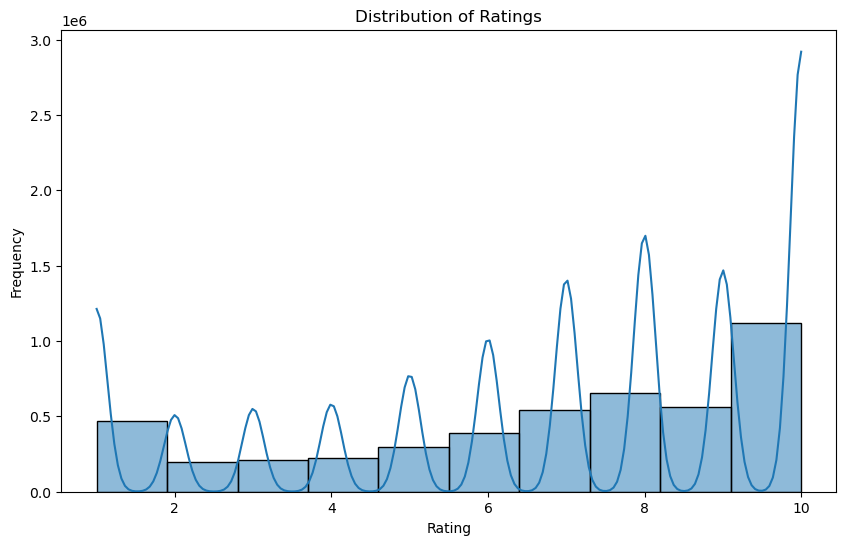

In [8]:
# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

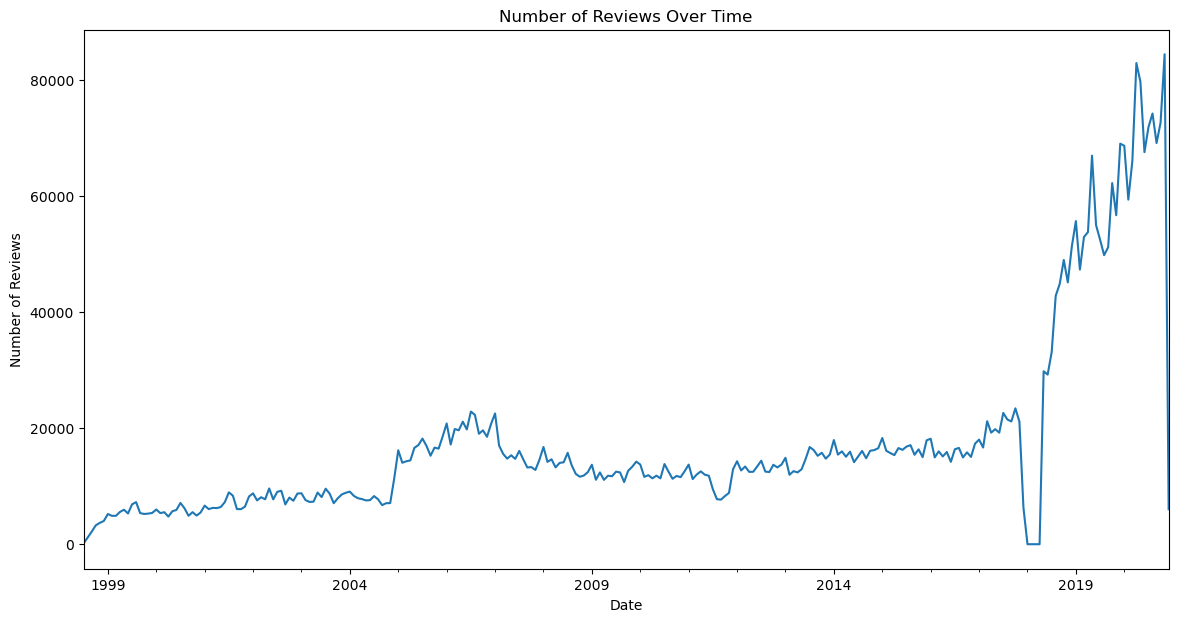

In [9]:
# Visualize the number of reviews over time
plt.figure(figsize=(14, 7))
df.set_index('review_date')['rating'].resample('M').count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

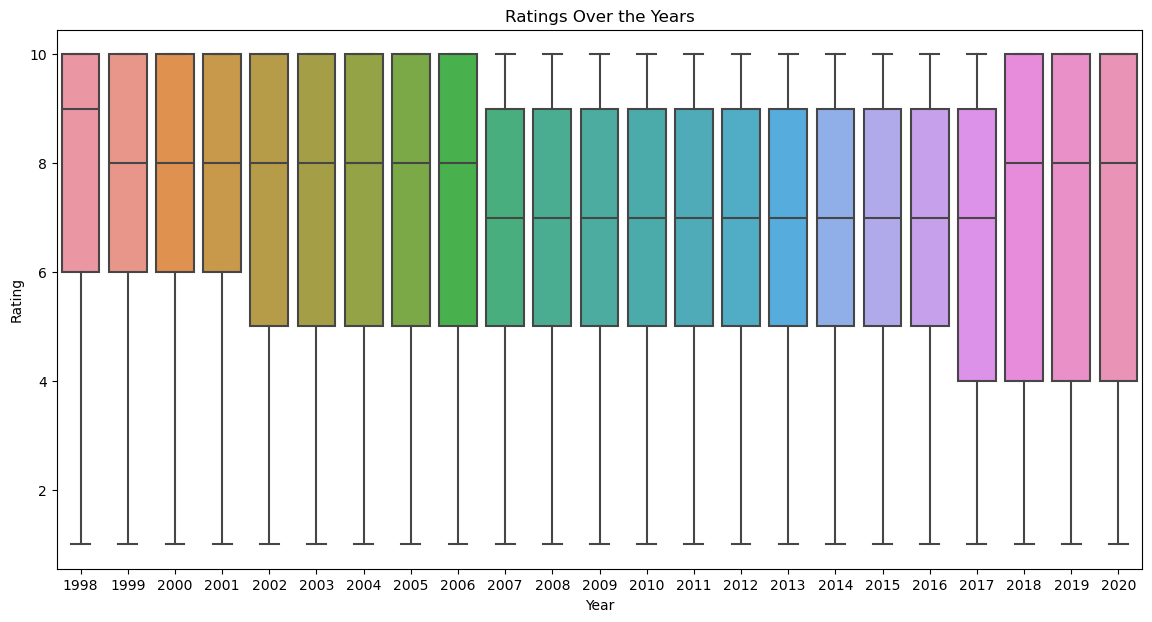

In [10]:
# Visualize the relationship between rating and review_date
plt.figure(figsize=(14, 7))
sns.boxplot(x=df['review_date'].dt.year, y='rating', data=df)
plt.title('Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [11]:
# Este código elimina los users duplicados que hacen reviews y se queda con la última review que hizo

df = pd.read_csv('newfile.csv')
df['review_date'] = pd.to_datetime(df['review_date'])
df = df.sort_values(by=['userID', 'review_date'])
df_unique = df.drop_duplicates(subset='userID', keep='last')
df_unique.to_csv('reviews_sin_duplicados.csv', index=False)

In [12]:
# Verificar si hay usuarios repetidos en el campo 'userID'

df_unique = pd.read_csv('reviews_sin_duplicados.csv')
usuarios_duplicados = df_unique[df_unique.duplicated(subset='userID', keep=False)]

if usuarios_duplicados.empty:
    print("No hay usuarios repetidos en el campo 'userID'.")
else:
    print("Se encontraron usuarios repetidos en el campo 'userID':")
    print(usuarios_duplicados['userID'].unique())


No hay usuarios repetidos en el campo 'userID'.


In [15]:
usuarios_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userID       0 non-null      object
 1   ttmovieID    0 non-null      object
 2   imdbID       0 non-null      int64 
 3   rating       0 non-null      int64 
 4   review_date  0 non-null      object
dtypes: int64(2), object(3)
memory usage: 0.0+ bytes
